# 002 - Exploratory Data Analysis

Author: Prasoon Karmacharya  
Last Update: 08/22/2020

In [4]:
# imports
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
import string
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
# To run the stopwords from NLTK run the following:
# nltk.download("stopwords")

### Load training and test data

In [6]:
train_df = pd.read_csv("../assets/data/jigsaw_data/train.csv.zip")
test_df = pd.read_csv("../assets/data/jigsaw_data/test.csv.zip")

In [7]:
train_df.loc[40:50,:]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
40,001735f961a23fc4,"""\n Sure, but the lead must briefly summarize ...",0,0,0,0,0,0
41,00173958f46763a2,TFD \n\nI think we just eced. I think we respo...,0,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0
45,001b2dd65d9d925c,I don't believe the Lisak criticism present th...,0,0,0,0,0,0
46,001c419c445b5a59,"You had a point, and it's now ammended with ap...",0,0,0,0,0,0
47,001c557175094f10,"In other words, you're too lazy to actually po...",0,0,0,0,0,0
48,001cadfd324f8087,"""\nAs for your claims of """"stalking"""", that is...",0,0,0,0,0,0
49,001d874a4d3e8813,"""::::Jmabel; in regards to predominant scholar...",0,0,0,0,0,0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


### Explore some of the comments

In [9]:
train_df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [10]:
train_df['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [11]:
toxicity_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
toxicity_count = train_df[toxicity_classes].apply(pd.value_counts)
toxicity_count.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,144277,157976,151122,159093,151694,158166
1,15294,1595,8449,478,7877,1405


In [12]:
toxicity_count.T 

,0,1
toxic,144277,15294
severe_toxic,157976,1595
obscene,151122,8449
threat,159093,478
insult,151694,7877
identity_hate,158166,1405


In [13]:
toxicity_proportion = train_df[toxicity_classes].apply(lambda x: x.value_counts(normalize=True))
toxicity_proportion.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.904156,0.990004,0.947052,0.997004,0.950636,0.991195
1,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805


In [14]:
toxicity_proportion.T

,0,1
toxic,0.904156,0.095844
severe_toxic,0.990004,0.009996
obscene,0.947052,0.052948
threat,0.997004,0.002996
insult,0.950636,0.049364
identity_hate,0.991195,0.008805


### Total number of comments per toxic category

In [15]:
toxic_class_labels = toxicity_count.T[1].index.tolist()
toxic_class_labels = [label.replace('_', ' ').capitalize() for label in toxic_class_labels]
count = (toxicity_count.T[1]).tolist()

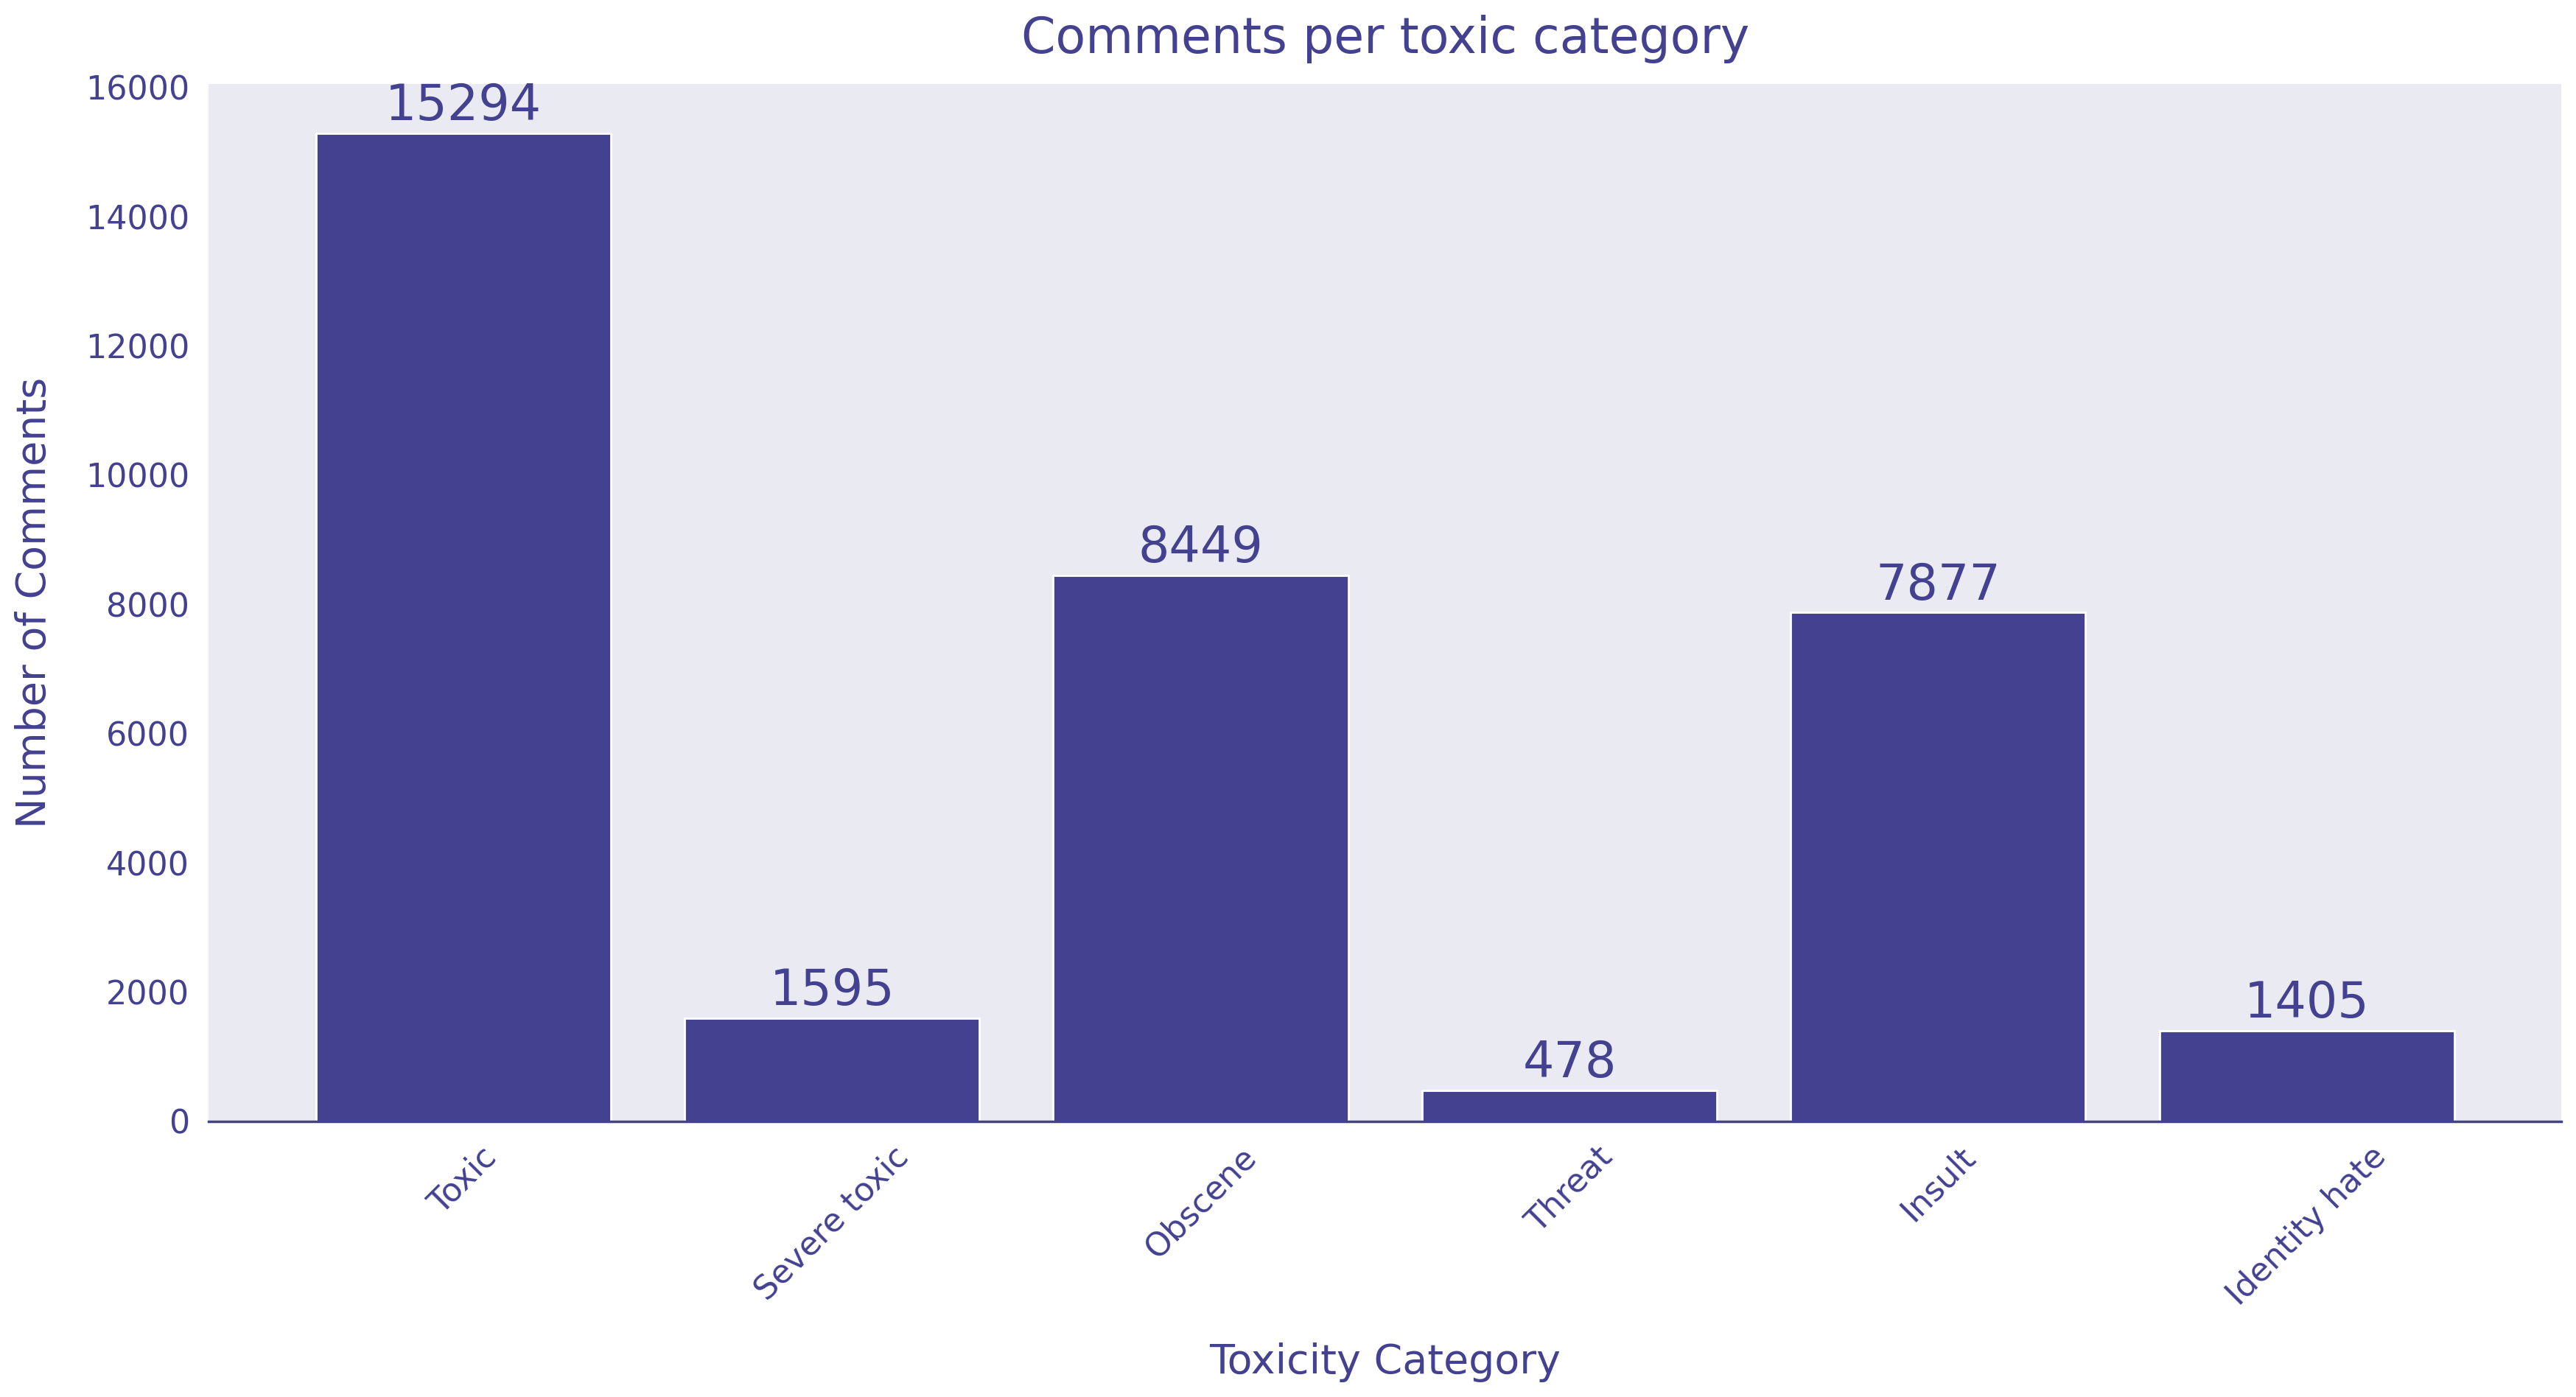

In [23]:
# pres_color = "#00ffcd"
pres_color = "#434190"

fig, ax = plt.subplots(figsize=(18,10),dpi=200)
bars = plt.bar(
        x = np.arange(len(count)),
        height = count,
        color = pres_color,
        tick_label = toxic_class_labels )

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color(pres_color)  #DDDDDD
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.grid(False)


# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 200,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=pres_color
    )

ax.set_xlabel('Toxicity Category', labelpad=15, color=pres_color, fontsize = 20)
ax.set_ylabel('Number of Comments', labelpad=15, color=pres_color, fontsize = 20)
ax.set_title('Comments per toxic category', pad=15, color=pres_color, fontsize = 24)

ax.tick_params(axis='x', colors=pres_color, labelsize=16, rotation=45)
ax.tick_params(axis='y', colors=pres_color, labelsize=16)

fig.tight_layout()

# fig.savefig('../assets/images/001_toxicity_classification.png',bbox_inches='tight', transparent=True, dpi=200)

### Proportion of comments per toxic category

In [ ]:
toxic_class_labels = toxicity_proportion.T[1].index.tolist()
toxic_class_labels = [label.replace('_', ' ').capitalize() for label in toxic_class_labels]
proportion = (toxicity_proportion.T[1] * 100).tolist() 

In [ ]:
pres_color = "#434190"

fig, ax = plt.subplots(figsize=(8,6), dpi=200)

bars = plt.bar(
        x = np.arange(len(proportion)),
        height = proportion,
        color = pres_color,
        tick_label = toxic_class_labels )


# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color(pres_color)  #DDDDDD
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.grid(False)


# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 200,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=pres_color
    )    

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Toxicity Levels', labelpad=15, color=pres_color, fontsize = 20)
ax.set_ylabel('Percentage', labelpad=15, color=pres_color, fontsize = 20)
ax.set_title('Proportions of comments per toxic category', pad=15, color=pres_color, fontsize = 24)

ax.tick_params(axis='x', colors=pres_color)
ax.tick_params(axis='y', colors=pres_color)


fig.tight_layout()

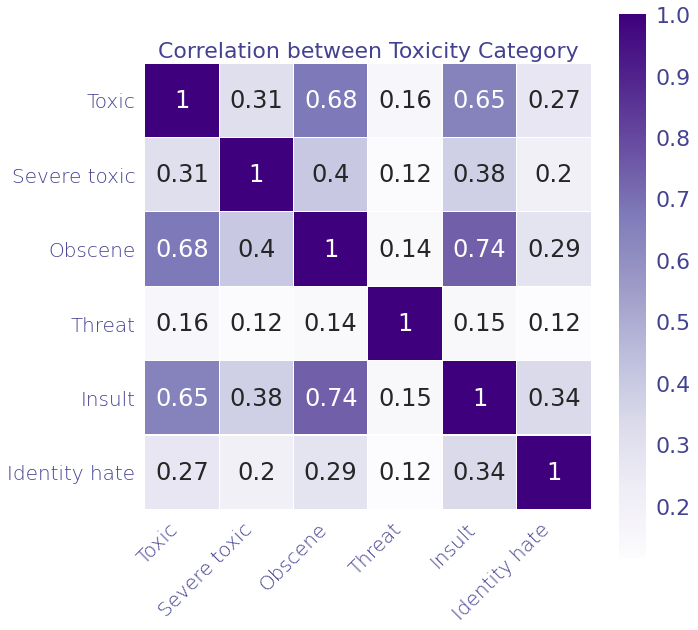

In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import hex2color
import matplotlib.colors as mc
colormap = plt.cm.Purples




def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

# hc = ["#00ffcd","#32ffd7", "#7fffe6", "#4cffdc", "#ccfff5","#ffffff"]
hc = ["#ffffff", "#ccfff5", "#4cffdc", "#7fffe6","#32ffd7", "#00ffcd" ]

th = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

cdict = NonLinCdict(th, hc)
cm = mc.LinearSegmentedColormap('test', cdict)




# # Set your custom color palette
# sns.set_palette(sns.color_palette(colors))


plt.figure(figsize=(10,10))
g = sns.heatmap(train_df[toxicity_classes].corr(),
            linewidths=0.1,
            linecolor= None,
            vmax =1.0,
            square=True,
            annot=True,
#             cmap=cm,  # for presentation
            cmap=colormap,                
            xticklabels=toxic_class_labels, 
            yticklabels=toxic_class_labels
           );
g.set_title('Correlation between Toxicity Category', fontsize=22, fontweight=500, color=pres_color)
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=20, fontweight=100, horizontalalignment='right', color=pres_color);
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=20, fontweight=100, horizontalalignment='right', color=pres_color);


colorbar = g.collections[0].colorbar
colorbar.ax.tick_params(color="#ffffff", labelcolor=pres_color)
# plt.savefig('../resources/images/002_toxicity_correlation.png', transparent=True, dpi=200, bbox_inches='tight')

### Comments with multiple Labels  - Demonstrating Interdependence of multi-class labels

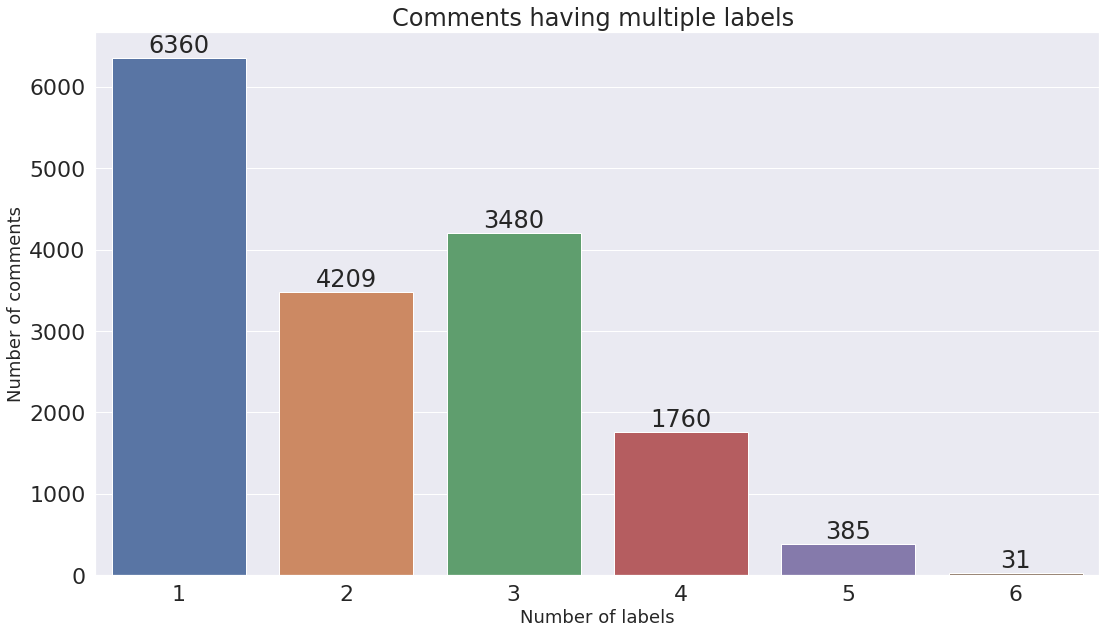

In [26]:
rowSums = train_df.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(18,10))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

## Key takeaways:
* There is a class imbalance problem
* Multi-labels are interdependent shown by high correlation and the last bar chart